This code amalgamates the summary information from the 'mylocalschool.wales' website into one large dictionary for easy access. 

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np

This is a list of the schools in the local area that we want to focus on.

In [2]:
local_schools = ['Severn Primary','St. Mary\'s R.C. Primary School','St.Paul\'s C/W Primary School','Grangetown Primary School','St Patrick\'s R C School','Ysgol Gynradd Gymraeg Hamadryad','Ninian Park Primary School','Kitchener Primary School','Radnor Primary School','Lansdowne Primary School','Ysgol Treganna','Ysgol Gymraeg Pwll Coch']

This function makes a dictionary which associates each school name to the URL of its summary page.

In [3]:
def make_school_URL_dict_from_list(schools):
    toppage = requests.get("http://mylocalschool.wales.gov.uk/Schools/SchoolSearch?lang=en")
    soup = BeautifulSoup(toppage.content, 'html.parser')
    school_links = soup.select("a[href*=/School]")[2:]
    schools = [list(school.children)[0] for school in school_links]
    school_URLs = ["http://mylocalschool.wales.gov.uk" + school['href'] for school in school_links]
    schoolURL_dict = {}
    for s,school in enumerate(schools):
        schoolURL_dict[school] = school_URLs[s]
    return schoolURL_dict

In [4]:
schoolURL_dict = make_school_URL_dict_from_list(local_schools)

This next function takes the URL of a schools summary page and makes a dictionary listing the stats for that school.

In [260]:
def tofloat(string):
    if string[-1] == '%':
        string = string[:-1]
    elif string == '' or string == '*':
        string = np.nan
    try:
        output = float(string)
    except ValueError:
        output = string
    return output
                
def make_stat_dict(schoolURL):
    school_pages = requests.get(schoolURL)
    school_soup = BeautifulSoup(school_pages.content, 'html.parser')
    summary = school_soup.find_all('div',id=False, class_="summaryBox")
    stat_dict = {}
    for i in range(len(summary)):
        stat = ''.join(char for char in list(summary[i].children)[1].getText() if char.isalnum() or char=='.')
        stat = tofloat(stat)
        stat_name = (''.join(char for char in list(summary[i].children)[3].getText() if char.isalnum() or char==' ')).strip()
        if '%' in list(summary[i].children)[1].getText(): stat_name += "(%)"
        stat_dict[stat_name] = stat
    return stat_dict

This dictionary links each school to the summary dictionary for that school.

In [6]:
local_school_dict = {}
for school in local_schools:
    local_school_dict[school] = make_stat_dict(schoolURL_dict[school])

Now we use pandas to turn this dictionary into a data frame.

In [7]:
import pandas as pd

In [8]:
local_school_df = pd.DataFrame.from_dict(local_school_dict, orient='index')

In [9]:
local_school_df

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Support Category,Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),Average number of minutes per week allocated for curricular PE Primary only,of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%)
Grangetown Primary School,404.0,27.2,19.6,94.2,3623.0,80.0,Yellow,76.3,NaN,NaN,NaN
Kitchener Primary School,486.0,29.9,20.5,94.5,3576.0,82.1,Green,80.8,105.0,74.0,26.0
Lansdowne Primary School,486.0,29.6,21.9,93.1,3442.0,85.1,Green,92.0,90.0,NaN,NaN
Ninian Park Primary School,557.0,23.7,24.3,94.1,3569.0,92.5,Green,84.0,NaN,61.0,32.0
Radnor Primary School,323.0,19.1,18.9,95.6,3862.0,100.0,Green,92.5,120.0,NaN,NaN
Severn Primary,482.0,24.0,20.9,93.9,3947.0,87.5,Green,85.5,90.0,NaN,NaN
St Patrick's R C School,298.0,23.2,24.4,94.0,3548.0,91.7,Yellow,95.3,NaN,NaN,NaN
St. Mary's R.C. Primary School,261.0,11.1,21.5,95.7,3388.0,92.3,Yellow,100.0,NaN,NaN,NaN
St.Paul's C/W Primary School,209.0,26.5,23.1,94.7,3774.0,92.9,Yellow,89.7,120.0,74.0,50.0
Ysgol Gymraeg Pwll Coch,506.0,9.5,22.6,95.8,3213.0,98.3,Yellow,95.2,NaN,NaN,NaN


Here we show a summary of the data.

In [10]:
local_school_df.describe()

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),Average number of minutes per week allocated for curricular PE Primary only,of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%)
count,12.000000,11.000000,12.000000,11.000000,12.000000,11.000000,11.000000,5.0,3.000000,3.000000
mean,387.666667,20.754545,21.600000,94.781818,4897.166667,90.354545,89.200000,105.0,69.666667,36.000000
std,171.661577,8.651285,2.355651,1.121444,4583.328680,6.206990,6.978682,15.0,7.505553,12.489996
min,17.000000,4.500000,17.000000,93.100000,3213.000000,80.000000,76.300000,90.0,61.000000,26.000000
25%,288.750000,15.100000,20.275000,94.050000,3428.500000,86.300000,84.750000,90.0,67.500000,29.000000
50%,443.000000,23.700000,21.700000,94.500000,3572.500000,91.700000,89.900000,105.0,74.000000,32.000000
75%,491.000000,26.850000,23.400000,95.650000,3796.000000,92.700000,93.850000,120.0,74.000000,41.000000
max,623.000000,29.900000,24.500000,97.000000,19436.000000,100.000000,100.000000,120.0,74.000000,50.000000


The total number of primary school students in the area is:

In [13]:
local_num_students = sum(local_school_df['Number of Pupils 2017'])
print(local_num_students)

4652.0


Here we use the number of primary school students and the percentage on free school meals to estimate the total number of children in the area who are on free school meals.

In [14]:
local_fsm_students = sum((pd.to_numeric(local_school_df['Free school meals FSM  3 year average Primary only(%)'])/100 \
                                                  * local_school_df['Number of Pupils 2017']).dropna())
print(local_fsm_students)

938.0369999999999


The percentage of primary school students in the area on free school meals is:

In [15]:
local_fsm_students/local_num_students * 100

20.164165950128975

We will now compare the local school statistics to the whole of Cardiff. This next function makes a list of every school in a given district (in this case we are interested in Cardiff), together with their URLs.

In [16]:
def make_district_school_URLdict(district): 
    toppage = requests.get("http://mylocalschool.wales.gov.uk/Schools/SchoolSearch?lang=en")
    soup = BeautifulSoup(toppage.content, 'html.parser')
    url_ref = [list(soup.find_all("option"))[-1]['value'] for i in range(len(list(soup.select('option')))) \
                                            if list(soup.find_all("option")[i])[0].strip() == district][0]
    school_url_string = "a[href*=/School/" + url_ref + "]"
    school_links = soup.select(school_url_string)
    schools = [list(school.children)[0] for school in school_links]
    school_URLs = ["http://mylocalschool.wales.gov.uk" + school['href'] for school in school_links]
    schoolURL_dict = {}
    for s,school in enumerate(schools):
        schoolURL_dict[school] = school_URLs[s]
    return schoolURL_dict


This next function searches for schools of a certain type (e.g. primary) in a given district and returns a dictionary of those schools with their URL.

In [18]:
def make_district_school_URLdict_by_type(district,schools=False):
    school_URLs = make_district_school_URLdict(district)
    schools_URLdict = {}
    for school in school_URLs.keys():
        school_pages = requests.get(school_URLs[school])
        school_soup = BeautifulSoup(school_pages.content, 'html.parser')
        school_type = list(school_soup.select("div[class=schDetailsText]")[1].children)[0].strip()
        if 'Primary' in schools:
            if ('Infants' or 'Juniors') in school_type:
                schools_URLdict[school] = school_URLs[school]
        if 'Secondary' in schools:
            if 'Secondary' in school_type:
                schools_URLdict[school] = school_URLs[school]         
    return schools_URLdict

In [19]:
primary_school_URLs = make_district_school_URLdict_by_type('Cardiff',schools=['Primary'])

We then make a dictionary linking each primary school in Cardiff to its summary information.

In [20]:
cardiff_primary_school_dict = {}
for school in primary_school_URLs.keys():
    cardiff_primary_school_dict[school] = make_stat_dict(primary_school_URLs[school])

We then turn this dictionary into a dataframe.

In [21]:
cardiff_primary_school_df = pd.DataFrame.from_dict(cardiff_primary_school_dict, orient='index')

In [22]:
cardiff_primary_school_df

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Support Category,Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Primary only
Adamsdown Primary,371.0,44.6,19.2,93.3,3757.0,78.3,Yellow,69.2,75.0,56.0,60.0
Albany Primary School,457.0,24.9,24.1,94.3,3422.0,77.8,Yellow,80.0,NaN,NaN,120.0
All Saints C/W Primary,194.0,19.2,22.9,94.6,3565.0,100.0,Yellow,93.3,NaN,NaN,NaN
Allensbank Primary School,283.0,24.6,19.1,92.6,4541.0,76.2,Amber,86.2,NaN,NaN,NaN
Baden Powell Primary School,417.0,35.2,20.8,93.8,3757.0,87.5,Amber,84.6,NaN,NaN,NaN
Birchgrove Primary School,413.0,8.5,25.9,96.2,3192.0,98.2,Green,94.8,74.0,51.0,100.0
Bishop Childs C/W Primary,212.0,12.2,25.9,95.4,3490.0,96.8,Green,93.5,NaN,NaN,NaN
Bryn Celyn Primary School,194.0,58.2,20.8,95.0,4357.0,85.7,Yellow,87.5,NaN,NaN,NaN
Bryn Deri Primary,251.0,4.3,20.4,96.5,3935.0,100.0,Green,96.7,NaN,NaN,NaN
Bryn Hafod Primary School,368.0,37.5,21.4,94.8,4270.0,95.5,Green,84.4,NaN,NaN,60.0


We can now look at the summary information for this data.

In [23]:
cardiff_primary_school_df.describe()

,Number of Pupils 2017,Free school meals FSM 3 year average Primary only(%),Pupil Teacher Ratio PTR Primary only,Attendance during the year Primary only(%),School budget per pupil,Pupils who have reached the expected level Core subject indicator Key Stage 2(%),Pupils achieving the expected outcome in the Foundation Phase areas of learning(%),of pupils in the school who enjoy PE lessons a lot(%),of pupils in the school who are hooked on sport(%),Average number of minutes per week allocated for curricular PE Primary only
count,98.000000,97.000000,98.000000,97.000000,98.000000,95.000000,95.000000,26.000000,26.000000,51.000000
mean,341.520408,23.885567,21.522449,94.945361,4070.428571,89.951579,88.174737,75.038462,47.384615,96.137255
std,144.794716,15.547923,2.941510,1.175622,1673.617133,7.333439,9.180587,8.224261,12.592305,30.408564
min,17.000000,1.900000,14.200000,92.100000,3095.000000,69.200000,44.400000,59.000000,26.000000,2.000000
25%,229.250000,9.900000,19.925000,94.100000,3491.750000,85.400000,83.650000,71.000000,36.250000,90.000000
50%,326.000000,23.700000,21.400000,94.900000,3812.000000,90.500000,90.500000,74.000000,49.500000,105.000000
75%,457.000000,34.300000,23.325000,95.800000,4200.750000,96.400000,94.850000,81.000000,56.000000,120.000000
max,708.000000,60.300000,28.600000,97.100000,19436.000000,100.000000,100.000000,93.000000,68.000000,120.000000


Calculate the number of primary school students in Cardiff.

In [25]:
cardiff_num_students = sum(cardiff_primary_school_df['Number of Pupils 2017'])
print(cardiff_num_students)

33469.0


Calculate the number of primary school students in Cardiff on FSM.

In [38]:
cardiff_fsm_students = sum((pd.to_numeric(cardiff_primary_school_df['Free school meals FSM  3 year average Primary only(%)'])/100 \
                                                  * cardiff_primary_school_df['Number of Pupils 2017']).dropna())
print(cardiff_fsm_students)

7513.486999999998


Calculate the percentage of primary school students in Cardiff who are on FSM.

In [39]:
cardiff_fsm_students/cardiff_num_students *100

22.44909319071379

From this we can see that the local schools actually have fewer primary school children on FSM. 

The my local schools website has many other tables we can study to get a more detailed picture of the schools than the summary information we have looked at so far. The function below takes the URL for the schools page and the tableid for the table you want (which you have to get by looking at the source code for the website) and returns the data from that table in a pandas data frame.

In [322]:
def load_table_into_dataFrame(schoolURL,tableid):
    school_pages = requests.get(schoolURL)
    school_soup = BeautifulSoup(school_pages.content, 'html.parser')
    table = school_soup.find_all('table', id=tableid)
    if table == []:
        return []
    columns = [int(table[0].find_all('th')[i].getText().strip()) for i in range(1,len(table[0].find_all('th')))]
    rows = [table[0].find_all('td')[i].getText().strip() \
            for i in range(len(table[0].find_all('td'))) if i%(len(columns)+1)==0]
    table_entries_list = [table[0].find_all('td')[i].getText().strip()\
                      for i in range(len(table[0].find_all('td'))) if i%(len(columns)+1)!=0]
    table_entries = {}
    for i,row in enumerate(rows):
        table_entries[row]={}
        for j,column in enumerate(columns):
            table_entries[row][column] = tofloat(table_entries_list[i*len(columns)+j])
    return pd.DataFrame.from_dict(table_entries,orient='index') 

Below are the tableids for the tables of special educational need (SEN) and English as an additional language (EAL). For information on what these statistics mean, look at the my local schools website.

In [323]:
sen_table_id = 'atbl239'
eal_table_id = 'atbl240'

We now make a dictionary linking each school to its SEN table.

In [331]:
sen_dict = {}
for school in primary_school_URLs.keys():
    sen_dict[school] = load_table_into_dataFrame(primary_school_URLs[school],sen_table_id)
    if not len(sen_dict[school]):
        del sen_dict[school]

Lets focus on the school action statistic. Here we make data frames for all primary schools in Cardiff and from this make another data frame with just the local schools.

In [361]:
school_action_dict = {}
for school in sen_dict.keys():
    school_action_dict[school] = sen_dict[school].loc['School - School Action']
school_action_df = pd.DataFrame.from_dict(school_action_dict,orient='index') 
local_school_action_df = school_action_df.loc[local_schools]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


Looking at the summary data, it seems like the local schools are fairly typical of Cardiff schools in general when it comes to the percentage of SEN students.

In [363]:
local_school_action_df.describe()

,2011,2012,2013,2014,2015,2016,2017
count,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,17.950000,19.836364,17.518182,19.236364,16.936364,14.127273,14.009091
std,6.224548,9.433798,8.569460,9.669361,8.769638,4.021216,5.605257
min,11.600000,4.500000,3.400000,6.800000,5.600000,6.100000,4.500000
25%,13.800000,13.500000,12.500000,11.000000,11.000000,11.700000,9.200000
50%,17.000000,21.200000,15.700000,20.000000,15.900000,14.300000,15.700000
75%,19.300000,23.400000,20.700000,23.150000,18.950000,17.400000,16.700000
max,33.100000,37.200000,35.100000,37.700000,35.900000,19.000000,24.600000


In [335]:
school_action_df.describe()

,2011,2012,2013,2014,2015,2016,2017
count,88.000000,91.000000,95.000000,93.000000,95.000000,94.000000,94.000000
mean,17.947727,18.998901,18.497895,18.000000,16.836842,15.830851,15.363830
std,9.182191,10.106230,9.224159,8.348015,8.681235,7.548667,7.749185
min,4.600000,4.500000,3.400000,2.400000,2.000000,3.400000,2.800000
25%,11.525000,10.600000,12.350000,11.500000,11.100000,9.925000,9.425000
50%,16.150000,17.400000,16.300000,17.400000,14.000000,14.350000,15.200000
75%,21.900000,24.200000,23.000000,23.500000,22.550000,19.875000,20.100000
max,46.200000,51.600000,50.400000,47.400000,41.100000,40.900000,38.200000


It would be interesting to note the total number of SEN students in the area. This data is not directly available, so I multiply the number of students in each school by the percentage of SEN students to get an approximate number.

Below is a histogram showing the difference between the number of SEN students at local schools and the median number of SEN students for Cardiff. Negative indicates schools with fewer SEN students than the Cardiff median. It shows a wide variation in the number of SEN students per school. St. Paul's C/W primary schools has the 3rd lowest number of SEN students of all the primary schools in Cardiff, while many other schools have a lot more.

In [423]:
number_local_sen_students = local_school_df['Number of Pupils 2017']*school_action_df.loc[local_schools,2017]/100
number_cardiff_sen_students = (cardiff_primary_school_df['Number of Pupils 2017']*school_action_df.loc[:,2017]/100)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1020: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


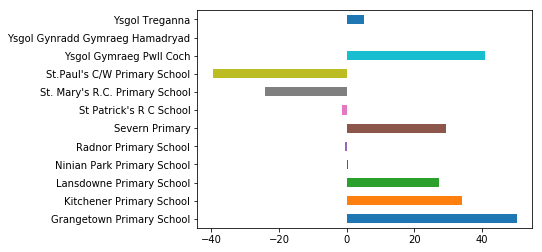

In [424]:
(number_local_sen_students-number_cardiff_sen_students.median()).plot(kind='barh')

Below is a histogram of the 10 primary schools with the most SEN students. Grangetown, one of our local schools is ranked number 7.

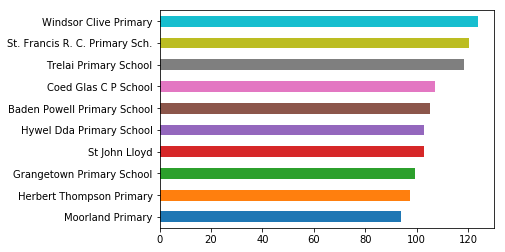

In [431]:
number_cardiff_sen_students.sort_values().dropna()[-10:].plot(kind='barh')

Below we can see that there is one local school (Grangetown) in the top decile for most SEN students. Five of our 12 local schools are in the top quartile for SEN.

In [447]:
upperQ = int(len(number_cardiff_sen_students.sort_values().dropna())*0.75)
upperD = int(len(number_cardiff_sen_students.sort_values().dropna())*0.90)

In [448]:
number_cardiff_sen_students.sort_values().dropna()[upperD:][local_schools]

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Severn Primary                        NaN
St. Mary's R.C. Primary School        NaN
St.Paul's C/W Primary School          NaN
Grangetown Primary School          99.384
St Patrick's R C School               NaN
Ysgol Gynradd Gymraeg Hamadryad       NaN
Ninian Park Primary School            NaN
Kitchener Primary School              NaN
Radnor Primary School                 NaN
Lansdowne Primary School              NaN
Ysgol Treganna                        NaN
Ysgol Gymraeg Pwll Coch               NaN
dtype: float64

In [449]:
number_cardiff_sen_students.sort_values().dropna()[upperQ:][local_schools]

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Severn Primary                     78.566
St. Mary's R.C. Primary School        NaN
St.Paul's C/W Primary School          NaN
Grangetown Primary School          99.384
St Patrick's R C School               NaN
Ysgol Gynradd Gymraeg Hamadryad       NaN
Ninian Park Primary School            NaN
Kitchener Primary School           83.106
Radnor Primary School                 NaN
Lansdowne Primary School           76.302
Ysgol Treganna                        NaN
Ysgol Gymraeg Pwll Coch            90.068
dtype: float64

Now we will look at the number of students in the local area who speak English as an additional language (EAL).

In [461]:
eal_dict = {}
for school in primary_school_URLs.keys():
    temp = load_table_into_dataFrame(primary_school_URLs[school],eal_table_id)
    try:
        eal_dict[school] = temp.loc['School']
    except KeyError:
        eal_dict[school] = np.nan


AttributeError: 'list' object has no attribute 'loc'

In [463]:
temp

[]